<h1><center>Fig4 stats

This notebook contains statistical analysis of the data from the figure 4 and its supplemental figure.

# Install libraries

Install necessary libraries to run statistical tests in R.

In [ ]:
# Use R in Jupyter Notebook
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("readxl")
install.packages("dplyr")

install.packages("ggplot2")

install.packages("nlme")
install.packages("multcomp")

In [ ]:
%%R
library("readxl")
library("dplyr")

library("ggplot2")

library("nlme")
library("multcomp")

And run function at the end of the notebook.

# Directory

Set directory with the source data. Mount disk if you use Google Colab.

In [ ]:
# Mount disk if you use Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change directory
%cd /content/drive/MyDrive/!lab/Manuscripts/LHoutputs/full submission 2/sourcedata

/content/drive/MyDrive/!lab/Manuscripts/LHoutputs/full submission 2/sourcedata


# 5HT OFT Fig4B

In [ ]:
%%R
df <- read_excel("fig4_5HT.xlsx", sheet="OFT")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

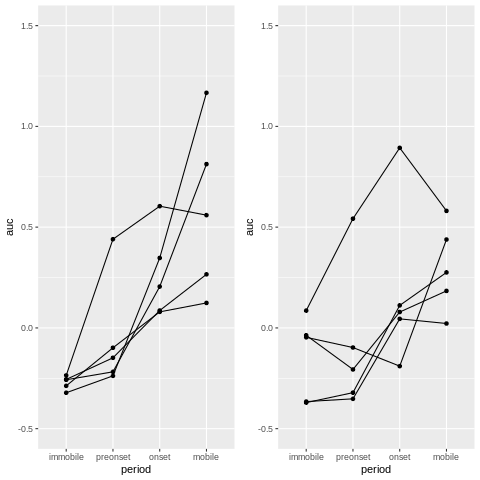

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-0.5,1.5)
p2 <- ggplot(df[(df$output=="5HT DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-0.5,1.5)
multiplot(p1,p2, cols=2)

$n \le 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value  Pr(>F)    
output         1   28.9    28.9   0.417   0.523    
period         3 2916.4   972.1  14.035 5.2e-06 ***
output:period  3  168.3    56.1   0.810   0.498    
Residuals     32 2216.4    69.3                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------5HT DRN----------------------')
sert = df[df$output=='5HT DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=sert)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0    5.800      1.715   3.383  0.00232 ** 
onset - immobile == 0      10.200      1.715   5.949  < 0.001 ***
mobile - immobile == 0     13.200      1.715   7.698  < 0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------5HT DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = sert, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile 

Mobile score

In [ ]:
%%R
df <- read_excel("fig4_5HT.xlsx", sheet="OFT_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

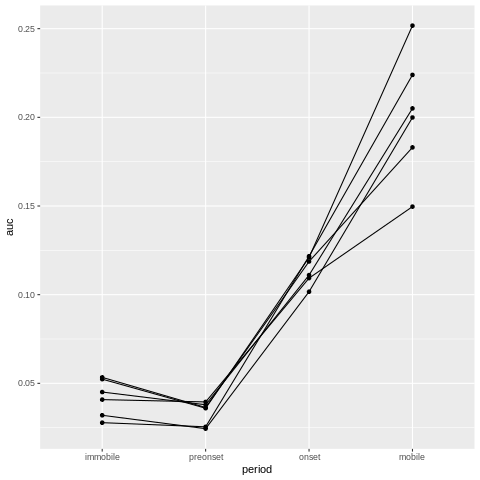

In [ ]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))

$n>6$

In [ ]:
%%R
print(c("immobile", shapiro.test(df[(df$period=="immobile"), ]$auc)$p.value))
print(c("preonset", shapiro.test(df[(df$period=="preonset"),]$auc)$p.value))
print(c("onset", shapiro.test(df[(df$period=="onset"),]$auc)$p.value))
print(c("mobile", shapiro.test(df[(df$period=="mobile"),]$auc)$p.value))

[1] "immobile"          "0.536175714601535"
[1] "preonset"           "0.0710360322380265"
[1] "onset"             "0.400752973575876"
[1] "mobile"            "0.992694364214186"


Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq Mean Sq F value   Pr(>F)    
period       3 0.11069 0.03690   103.3 2.41e-12 ***
Residuals   20 0.00714 0.00036                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0 -0.00863    0.01048  -0.823    0.747    
onset - immobile == 0     0.07199    0.01048   6.867   <1e-05 ***
mobile - immobile == 0    0.16031    0.01048  15.291   <1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# 5HT TST Fig4C

In [ ]:
%%R
df <- read_excel("fig4_5HT.xlsx", sheet="TST")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

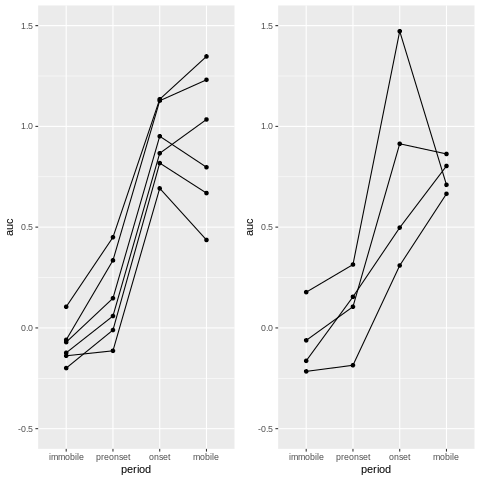

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-0.5,1.5)
p2 <- ggplot(df[(df$output=="5HT DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-0.5,1.5)
multiplot(p1,p2, cols=2)

In [ ]:
%%R
print(c("LHA-DRN immobile", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="immobile"), ]$auc)$p.value))
print(c("LHA-DRN preonset", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="preonset"),]$auc)$p.value))
print(c("LHA-DRN onset", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="onset"),]$auc)$p.value))
print(c("LHA-DRN mobile", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="mobile"),]$auc)$p.value))

[1] "LHA-DRN immobile"  "0.454984313085737"
[1] "LHA-DRN preonset"  "0.810649889812562"
[1] "LHA-DRN onset"     "0.574349278346272"
[1] "LHA-DRN mobile"    "0.869652763821955"


In [ ]:
%%R
print(c("LHA-DRN immobile", shapiro.test(df[(df$output=="5HT DRN" & df$period=="immobile"), ]$auc)$p.value))
print(c("LHA-DRN preonset", shapiro.test(df[(df$output=="5HT DRN" & df$period=="preonset"),]$auc)$p.value))
print(c("LHA-DRN onset", shapiro.test(df[(df$output=="5HT DRN" & df$period=="onset"),]$auc)$p.value))
print(c("LHA-DRN mobile", shapiro.test(df[(df$output=="5HT DRN" & df$period=="mobile"),]$auc)$p.value))

[1] "LHA-DRN immobile"  "0.452267114773057"
[1] "LHA-DRN preonset"  "0.707536799027754"
[1] "LHA-DRN onset"     "0.692022208649824"
[1] "LHA-DRN mobile"    "0.757037096832659"


Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1  0.063  0.0631   0.970    0.332    
period         3  7.288  2.4292  37.332 1.45e-10 ***
output:period  3  0.046  0.0153   0.235    0.871    
Residuals     32  2.082  0.0651                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------5HT DRN----------------------')
sert = df[df$output=='5HT DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=sert)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0  0.22547    0.07019   3.212  0.00368 ** 
onset - immobile == 0     1.01261    0.07019  14.427  < 0.001 ***
mobile - immobile == 0    1.00013    0.07019  14.250  < 0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------5HT DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = sert, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0    1.7

Mobile score

In [ ]:
%%R
df <- read_excel("fig4_5HT.xlsx", sheet="TST_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

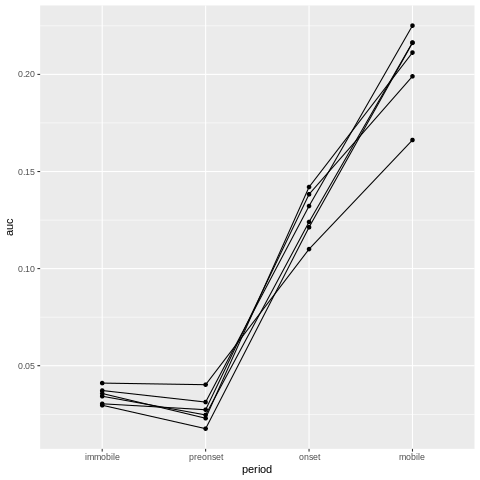

In [ ]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))

$n>6$

In [ ]:
%%R
print(c("immobile", shapiro.test(df[(df$period=="immobile"), ]$auc)$p.value))
print(c("preonset", shapiro.test(df[(df$period=="preonset"),]$auc)$p.value))
print(c("onset", shapiro.test(df[(df$period=="onset"),]$auc)$p.value))
print(c("mobile", shapiro.test(df[(df$period=="mobile"),]$auc)$p.value))

[1] "immobile"          "0.791228429395209"
[1] "preonset"          "0.879580935248378"
[1] "onset"             "0.857147823010925"
[1] "mobile"           "0.11569993718362"


Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq Mean Sq F value  Pr(>F)    
period       3 0.12899 0.04300   257.7 3.8e-16 ***
Residuals   20 0.00334 0.00017                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(auc ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = df, random = ~1 | mouse)

Linear Hypotheses:
                          Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0 -0.007379   0.007457   -0.99    0.632    
onset - immobile == 0     0.093265   0.007457   12.51   <1e-04 ***
mobile - immobile == 0    0.171007   0.007457   22.93   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# DA OFT Fig4E

In [ ]:
%%R
df <- read_excel("fig4_DA.xlsx", sheet="OFT")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

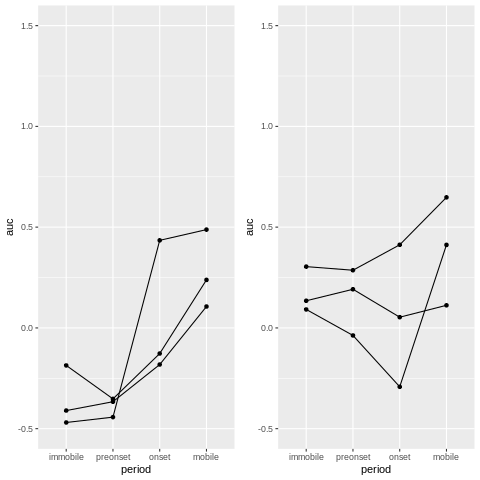

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-0.5,1.5)
p2 <- ggplot(df[(df$output=="DA VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse)) + ylim(-0.5,1.5)
multiplot(p1,p2, cols=2)

$n<5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value Pr(>F)  
output         1  216.0  216.00   8.177 0.0114 *
period         3  337.3  112.44   4.257 0.0217 *
output:period  3  174.0   58.00   2.196 0.1283  
Residuals     16  422.7   26.42                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-VTA----------------------')
drn = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('-----------------------DA VTA----------------------')
da = df[df$output=='DA VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=da)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0   0.3333     1.5986   0.209   0.9937    
onset - immobile == 0      5.3333     1.5986   3.336   0.0024 ** 
mobile - immobile == 0     7.0000     1.5986   4.379   <0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "-----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = da, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)
preonset - immobile == 0  

Mobile score

In [ ]:
%%R
df <- read_excel("fig4_DA.xlsx", sheet="OFT_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

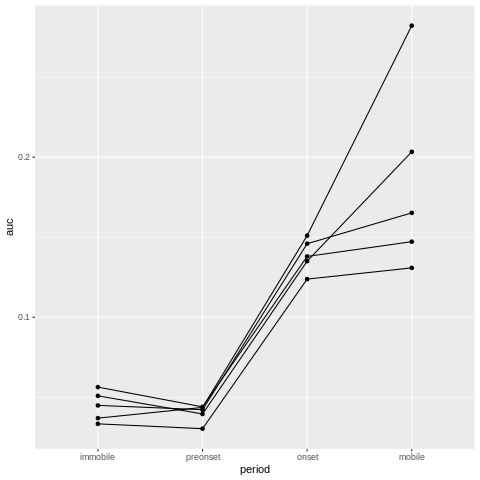

In [ ]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))

$n \le 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq  Mean Sq F value   Pr(>F)    
period       3 0.07754 0.025848   26.78 1.78e-06 ***
Residuals   16 0.01544 0.000965                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = df, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0    -1.80       1.34  -1.343    0.395    
onset - immobile == 0        7.60       1.34   5.670   <1e-04 ***
mobile - immobile == 0      10.60       1.34   7.908   <1e-04 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# DA TST Fig4F

In [ ]:
%%R
df <- read_excel("fig4_DA.xlsx", sheet="TST")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

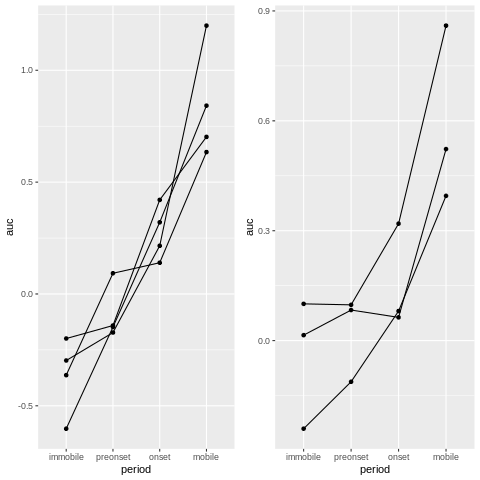

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(df[(df$output=="DA VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2, cols=2)

$n<5$

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1    5.3     5.3   0.481    0.496    
period         3 1441.9   480.6  44.026 5.37e-09 ***
output:period  3  161.6    53.9   4.933    0.010 *  
Residuals     20  218.3    10.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
print('----------------------LHA-VTA----------------------')
drn = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('-----------------------DA VTA----------------------')
sert = df[df$output=='DA VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=sert)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0   4.0000     0.9129   4.382 3.41e-05 ***
onset - immobile == 0      8.0000     0.9129   8.764  < 1e-05 ***
mobile - immobile == 0    12.0000     0.9129  13.145  < 1e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "-----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = sert, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile 

Mobile score

In [ ]:
%%R
df <- read_excel("fig4_DA.xlsx", sheet="TST_mobileScore")
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('immobile','preonset','onset','mobile')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('immobile','preonset','onset','mobile'))

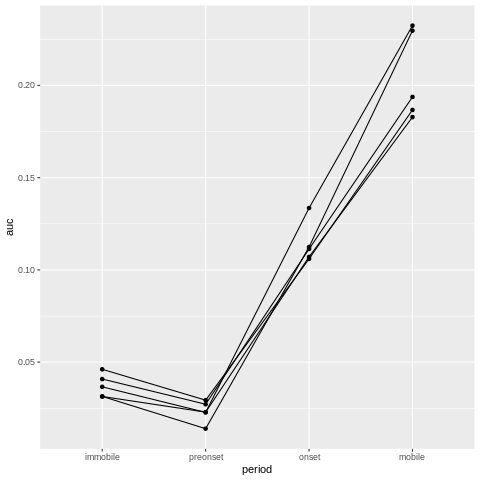

In [ ]:
%%R
ggplot(df, aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))

$n \le 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ period, random=~1|mouse, data=df)
summary(anova)

            Df  Sum Sq Mean Sq F value  Pr(>F)    
period       3 0.10481 0.03494   179.2 1.6e-12 ***
Residuals   16 0.00312 0.00019                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=df)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = df, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
preonset - immobile == 0       -5          1      -5 1.43e-06 ***
onset - immobile == 0           5          1       5 1.34e-06 ***
mobile - immobile == 0         10          1      10  < 1e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)



# 5HT APT FigSupp1B


In [ ]:
%%R
df <- read_excel("fig4_5HT.xlsx", sheet="APT")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','airpuff')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','airpuff'))

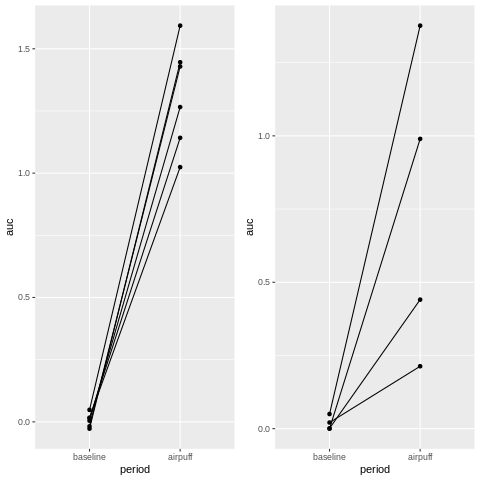

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(df[(df$output=="5HT DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2, cols=2)

Normality test

In [ ]:
%%R
print(c("LHA-DRN immobile", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="baseline"), ]$auc)$p.value))
print(c("LHA-DRN preonset", shapiro.test(df[(df$output=="LHA-DRN" & df$period=="airpuff"),]$auc)$p.value))

[1] "LHA-DRN immobile"  "0.818533155117581"
[1] "LHA-DRN preonset"  "0.863385491819963"


In [ ]:
%%R
print(c("5HT DRN immobile", shapiro.test(df[(df$output=="5HT DRN" & df$period=="baseline"), ]$auc)$p.value))
print(c("5HT DRN preonset", shapiro.test(df[(df$output=="5HT DRN" & df$period=="airpuff"),]$auc)$p.value))

[1] "5HT DRN immobile"  "0.276842295408723"
[1] "5HT DRN preonset"  "0.728018280002149"


Repeated measures ANOVA with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(auc ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1  0.363   0.363   5.461   0.0328 *  
period         1  5.843   5.843  87.918 6.68e-08 ***
output:period  1  0.394   0.394   5.933   0.0269 *  
Residuals     16  1.063   0.066                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(auc ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------5HT DRN----------------------')
sert = df[df$output=='5HT DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=sert)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = auc ~ period, data = drn, random = ~1 | mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0  1.31028    0.08711   15.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------5HT DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = sert, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   4.0000     0.8165   4.899 9.63e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- sin

# 5HT SCT FigSupp1C


In [ ]:
%%R
df <- read_excel("fig4_5HT.xlsx", sheet="SCT")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','onset','drinking')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','onset','drinking'))

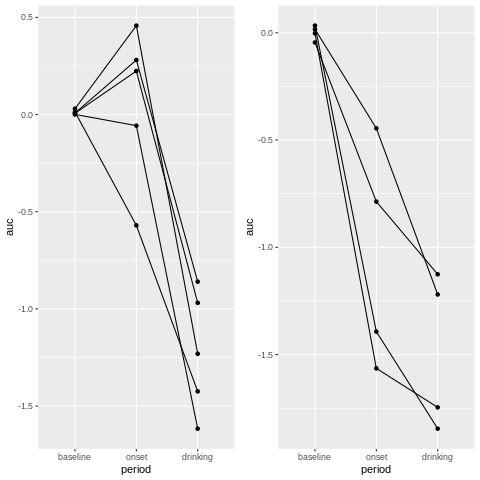

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(df[(df$output=="5HT DRN"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2, cols=2)

$n \le 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1  163.3   163.3   8.594  0.00797 ** 
period         2  896.9   448.4  23.593 4.26e-06 ***
output:period  2  178.6    89.3   4.699  0.02059 *  
Residuals     21  399.1    19.0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-DRN----------------------')
drn = df[df$output=='LHA-DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('----------------------5HT DRN----------------------')
sert = df[df$output=='5HT DRN',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=sert)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0        1.00       1.39   0.719    0.693    
drinking - baseline == 0    -7.00       1.39  -5.034 9.58e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "----------------------5HT DRN----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = sert, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0      -5.000      1.333   -3.75  0.00035 ***
drinking - baseline 

# DA APT FigSupp1E

In [ ]:
%%R
df <- read_excel("fig4_DA.xlsx", sheet="APT")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','airpuff')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','airpuff'))

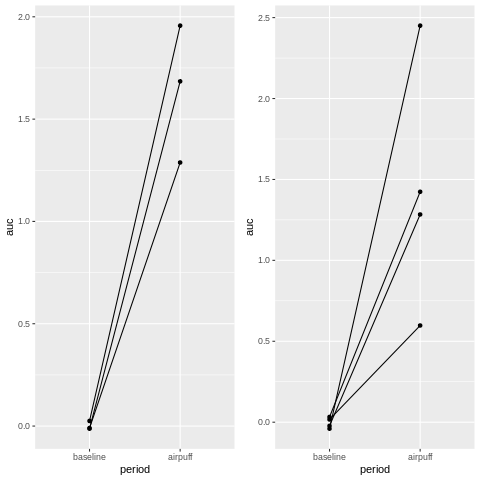

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(df[(df$output=="DA VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2, cols=2)

$n<5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1   2.62    2.62   0.495 0.497969    
period         1 171.50  171.50  32.308 0.000203 ***
output:period  1   0.29    0.29   0.055 0.819401    
Residuals     10  53.08    5.31                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-VTA----------------------')
drn = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('-----------------------DA VTA----------------------')
da = df[df$output=='DA VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=da)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   3.0000     0.5774   5.196 2.03e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "-----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = da, random = ~1 | 
    mouse)

Linear Hypotheses:
                        Estimate Std. Error z value Pr(>|z|)    
airpuff - baseline == 0   4.0000     0.9129   4.382 1.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values report

# DA SCT FigSupp1F

In [ ]:
%%R
df <- read_excel("fig4_DA.xlsx", sheet="SCT")
df$output = as.factor(df$output)
df$period = as.factor(df$period)
df$auc = as.numeric(df$auc)

In [ ]:
%%R
neworder <- c('baseline','onset','drinking')
df <- arrange(transform(df, period=factor(period,levels=neworder)),period)
df$period <- factor(df$period, labels=c('baseline','onset','drinking'))

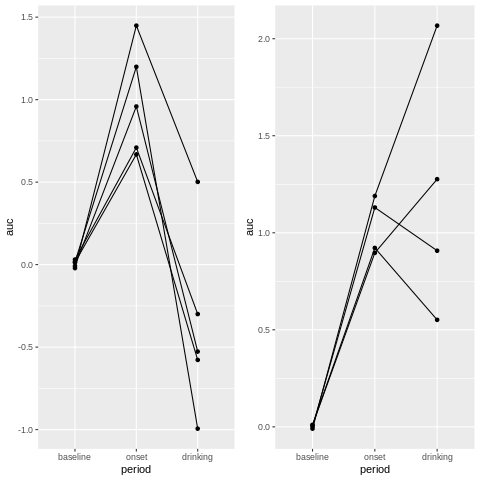

In [ ]:
%%R
p1 <- ggplot(df[(df$output=="LHA-VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
p2 <- ggplot(df[(df$output=="DA VTA"),], aes(x=period, y=auc)) + geom_point() + geom_line(aes(group=mouse))
multiplot(p1,p2, cols=2)

$n \le 5$

Repeated measures ANOVA on ranks with Dunnett poshoc analysis

In [ ]:
%%R
anova <- aov(rank(auc) ~ output*period, random=~1|mouse, data=df)
summary(anova)

              Df Sum Sq Mean Sq F value   Pr(>F)    
output         1  173.4   173.4   10.48 0.003940 ** 
period         2  666.9   333.4   20.16  1.3e-05 ***
output:period  2  450.4   225.2   13.62 0.000161 ***
Residuals     21  347.3    16.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
print('----------------------LHA-VTA----------------------')
drn = df[df$output=='LHA-VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=drn)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

print('-----------------------DA VTA----------------------')
da = df[df$output=='DA VTA',]
lme.model <- lme(rank(auc) ~ period, random=~1|mouse, data=da)
print(summary(glht(lme.model, linfct=mcp(period="Dunnet"))))

[1] "----------------------LHA-VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = drn, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0       6.000      1.528   3.928  0.00017 ***
drinking - baseline == 0   -3.000      1.528  -1.964  0.08994 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)

[1] "-----------------------DA VTA----------------------"

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lme.formula(fixed = rank(auc) ~ period, data = da, random = ~1 | 
    mouse)

Linear Hypotheses:
                         Estimate Std. Error z value Pr(>|z|)    
onset - baseline == 0       5.750      1.607   3.577 0.000684 ***
drinking - baseline ==

# Functions

In [ ]:
%%R
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}